In [4]:
from sklearn import linear_model
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df=pd.read_csv(r'D:\swastik\ML\datasets\FuelConsumption (linear regression).csv')
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [5]:
kk=np.random.rand(len(df)) < .8  # training 80%
newdf=df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
train=newdf[kk]
test=newdf[~kk]
train_x=np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB']])
train_y=np.asanyarray(train[['CO2EMISSIONS']])

In [8]:
lr=linear_model.LinearRegression()
lr.fit(train_x,train_y)

LinearRegression()

Evaluation

In [9]:
print(f'intercept : {lr.intercept_} coefs: {lr.coef_}')

intercept : [67.05494968] coefs: [[ 11.18101468   7.51325047 -18.83958611 -17.23597488  45.08339097]]


In [11]:
test_x=np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB']])
test_y=np.asanyarray(test[['CO2EMISSIONS']])

metrics

In [15]:
from sklearn.metrics import r2_score
pred_y=lr.predict(test_x)
mae=np.mean(np.absolute(test_y - pred_y))
mse=np.mean((test_y - pred_y)**2)
rmse=mse**(0.5)
r2=r2_score(test_y,pred_y)
print(f'mae : {mae}  mse : {mse}  rmse : {rmse} r2 score : {r2}')

mae : 17.262326741726465  mse : 566.4008753731212  rmse : 23.799178039863502 r2 score : 0.8582662543390209


plots

Text(0, 0.5, 'EMISSIONS')

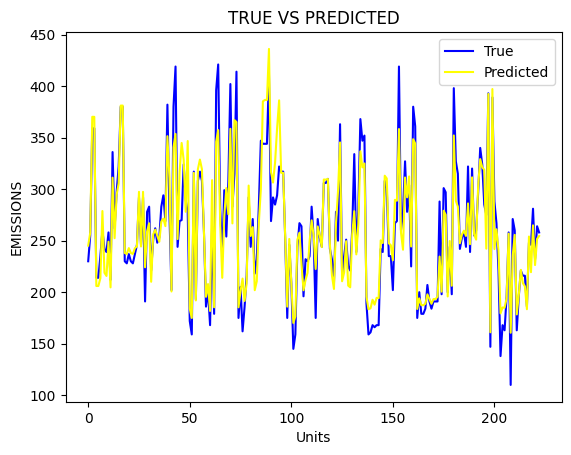

In [19]:

plt.plot(test_y,color='blue',label='True')
plt.plot(pred_y,color='yellow',label='Predicted')
plt.title('TRUE VS PREDICTED')
plt.legend()
plt.xlabel('Units')
plt.ylabel('EMISSIONS')